# Cyclistic bike-share analysis case study
#### Coursera Capstone Project for Google Data Analytics Certificate Course
*** 

## Background
#### About the company 
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that 
are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and 
returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. 
One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, 
and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers 
who purchase annual memberships are Cyclistic members.

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the 
pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will 
be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a 
very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic 
program and have chosen Cyclistic for their mobility needs.

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to 
do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why 
casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are 
interested in analyzing the Cyclistic historical bike trip data to identify trends.

## Ask
### Business Problem
Design marketing strategies aimed at converting casual riders into annual members.

Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

### Assignment
Answer the question: How do annual members and casual riders use Cyclistic bikes differently?
Produce a report with the following deliverables:
1. A clear statement of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top three recommendations based on your analysis


### Data Preparation Notes
Using the last 12 months of trip data in dataset (date range 202205-202304 as indicated in file names) 

The data that we will be using is Cyclistic’s historical trip data from last 12 months (202205-202304). The data has been made available by Motivate International Inc. on this [link](https://divvy-tripdata.s3.amazonaws.com/index.html) under this [license](https://www.divvybikes.com/data-license-agreement).

_Note that one file name 202209-divvy-publictripdata.csv had a name discrepancy - all other files were named in the format yyyymm-divvy-tripdata.csv._  

ROCCC approach is used to determine the credibility of the data

* Reliable – It is complete and accurate and it represents all bike rides taken in the city of Chicago for the selected duration of our analysis.
* Original - The data is made available by Motivate International Inc. which operates the city of Chicago’s Divvy bicycle sharing service which is powered by Lyft.
* Comprehensive - the data includes all information about ride details including starting time, ending time, station name, station ID, type of membership and many more.
* Current – It is up-to-date as it includes data until end of May 2021
* Cited - The data is cited and is available under Data License Agreement.


### Data Processing Notes
#### Tools
* MBP M1Max 64GB
* DB Browser for SqlLite
* SqlLite3
* VS Code (IDE with extensions including Data Wrangler)
* Jupyter Notebook
#### Data Staging/Cleaning
* Created an empty SqlLite database and imported each of the 12 CSV files into separate tables indentified by YYYYMM in table name
* Created a view that combined all tables into a single table - compared row counts to validate
* Added additional columns to support analysis
    * ride_duration_secs
    * ride_duration_mins
    * season (Spring, Summer, Fall, Winter) using meteorological seasons 
    * day_number (1-7)
    * weekday (Monday..Sunday)
* Noticed ride_durations with negative values; assumed started_at and ended_at enties were reversed so used abs() in duration calculation; also noticed zero values 
* Rideable types have three values fpr casual but only two for members;  the type "docked_bike" is unique.  There should be only the two types.  To fix this anomaly, I counted docked_bikes as classic bikes because the choices were in line with member choices. 
#### Analysis

<code>Given the available and derived/calculated data what could this data tells us about how members and casual riders use Cyclistic bikes differently?</code>
* What types of bikes are used members and casual riders?
* How do ride durations compare?
* How do ride counts compare?
* How do the temporal aspects compare (month, day of week, time of day, season)?
* What stations are most frequently used by each type of rider?  

_It might have been interesting to examine ride distances but although the data includes a start and end lat and long, that is not enough information to calculate actual distance travelled._
***

## Let's start using the data

In [ ]:
# %pip install ipython-sql
#Introduces a %sql (or %%sql) magic.
# Connect to a database, using SQLAlchemy URL connect strings, then issue SQL commands within IPython or IPython Notebook.
%load_ext sql
#data tables in sqlite db including a consolidated table with all data; data enhancements are contained in views to ensure original data integrity
%sql sqlite://///Users/dinorusso/PyDev/Coursera_Case_Study_1/Cyclistic_Trip_Data/DB/cyclistic_v5.db

In [71]:
# peek at the data contained in the last view - v7 as a dataframe
result = %sql select * from v7
df = result.DataFrame()
df.head()

 * sqlite://///Users/dinorusso/PyDev/Coursera_Case_Study_1/Cyclistic_Trip_Data/DB/cyclistic_v5.db
Done.


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,ride_duration_mins,season,day_number,weekday,bike_type,season_number,is_member_ride,is_casual_ride,member_ride_duration_mins,casual_ride_duration_mins
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,...,33.0,Spring,1,Monday,classic_bike,2,1,0,33.0,0.0
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,...,38.0,Spring,3,Wednesday,classic_bike,2,1,0,38.0,0.0
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,...,22.0,Spring,4,Thursday,classic_bike,2,1,0,22.0,0.0
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,...,9.0,Spring,2,Tuesday,classic_bike,2,1,0,9.0,0.0
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,...,5.0,Spring,2,Tuesday,classic_bike,2,1,0,5.0,0.0


In [72]:
df.describe()

,start_lat,start_lng,end_lat,end_lng,ride_duration_secs,ride_duration_mins,day_number,season_number,is_member_ride,is_casual_ride,member_ride_duration_mins,casual_ride_duration_mins
count,5.859061e+06,5.859061e+06,5.853088e+06,5.853088e+06,5.859061e+06,5.859061e+06,5.859061e+06,5.859061e+06,5.859061e+06,5.859061e+06,5.859061e+06,5.859061e+06
mean,4.190262e+01,-8.764770e+01,4.190284e+01,-8.764778e+01,1.136401e+03,1.893804e+01,3.107713e+00,2.855357e+00,5.974940e-01,4.025060e-01,7.469428e+00,1.146861e+01
std,4.581984e-02,2.865640e-02,6.717431e-02,1.064370e-01,1.045984e+04,1.743318e+02,2.001841e+00,9.279801e-01,4.904028e-01,4.904028e-01,2.328518e+01,1.732648e+02
min,4.164000e+01,-8.784000e+01,0.000000e+00,-8.814000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.188103e+01,-8.766140e+01,4.188103e+01,-8.766150e+01,3.390000e+02,6.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.190000e+01,-8.764414e+01,4.190000e+01,-8.764434e+01,5.990000e+02,1.000000e+01,3.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00
75%,4.193000e+01,-8.762980e+01,4.193000e+01,-8.762991e+01,1.075000e+03,1.800000e+01,5.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,1.000000e+01
max,4.207000e+01,-8.752000e+01,4.237000e+01,0.000000e+00,2.483235e+06,4.138700e+04,6.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,1.035300e+04,4.138700e+04


Quick Stats across all rides 

In [73]:
# for context - how many of each rider type rides do we have
df['member_casual'].value_counts()

member_casual
member    3500754
casual    2358307
Name: count, dtype: int64

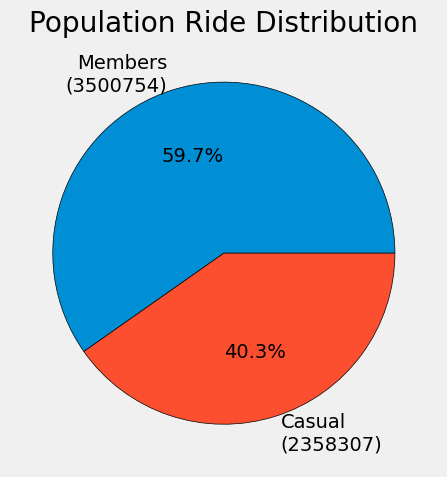

In [74]:
# create viz as a pie chart

from matplotlib import  pyplot as plt
plt.style.use("fivethirtyeight")
labels = ['Members\n(' + str(df['member_casual'].value_counts()[0]) +')', 'Casual\n(' + str(df['member_casual'].value_counts()[1]) + ')']
plt.rcParams["figure.figsize"] = (10,5)
plt.pie(df['member_casual'].value_counts(), labels = labels,
        autopct='%1.1f%%',
        wedgeprops={'edgecolor':'black'} )
plt.title("Population Ride Distribution")
plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

### What types of bikes are used by riders?

In [10]:
# lets take a look at rideable_type (bike type) members vs casual
df_biketypes = df[['member_casual','bike_type' ]]

import pandas as pd
pivot = pd.crosstab(df_biketypes['member_casual'],
                     df_biketypes['bike_type'],
                     values=df_biketypes['bike_type'],
                     aggfunc='count').fillna(0)
pivot.head(20)


bike_type,classic_bike,electric_bike
member_casual,,
casual,1061764,1296543
member,1751339,1749415


(<Figure size 700x350 with 3 Axes>,
 {('casual', 'classic_bike'): (0.0,
   0.0,
   0.4005034474556988,
   0.44872722035362583),
  ('casual', 'electric_bike'): (0.0,
   0.4520494794898385,
   0.4005034474556988,
   0.5479505205101615),
  ('member', 'classic_bike'): (0.4054785718338083,
   0.0,
   0.5945214281661918,
   0.49861275542544387),
  ('member', 'electric_bike'): (0.4054785718338083,
   0.5019350145616565,
   0.5945214281661918,
   0.49806498543834343)})

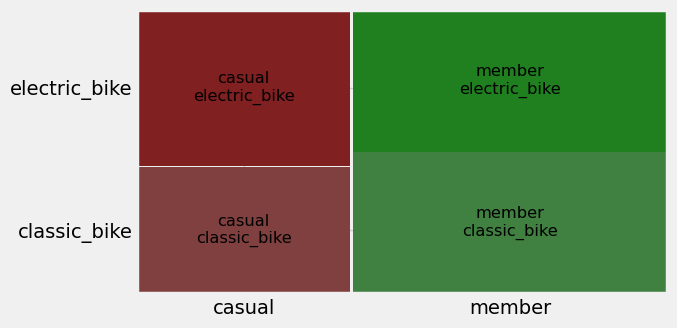

In [11]:

import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
mosaic(pivot.stack(), axes_label=True)

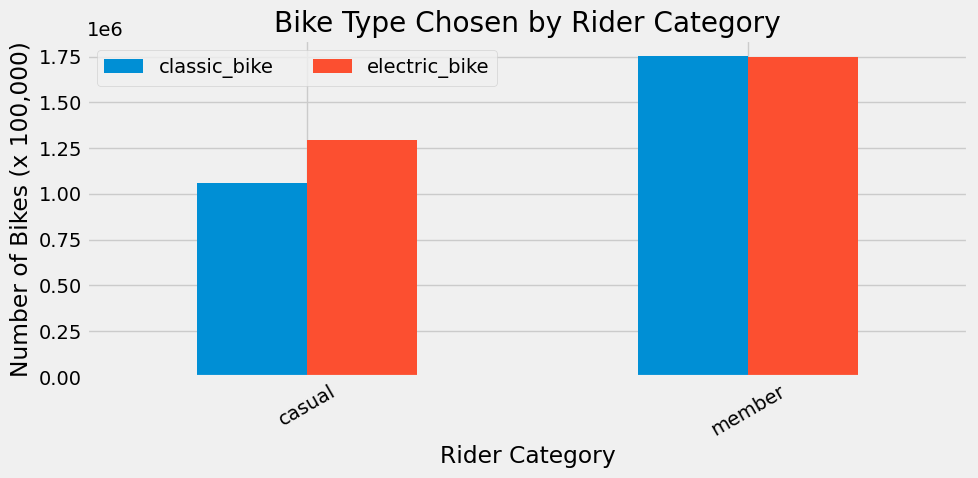

In [60]:
# I was not satisfied that the mosaic plot was clear enough so created a bar chart
ax = pivot.plot(kind="bar",figsize=(10,5), title="Bike Type Chosen by Rider Category").legend(loc='upper left', ncol=2)
plt.xlabel("Rider Category")
plt.ylabel("Number of Bikes (x 100,000)")
plt.xticks(rotation=30, horizontalalignment="center")
plt.tight_layout()

No real insight.  Looks like both rider type choose bikes similarly (i.e. not a large preference between classic and electric).

What about temporal distinctions? 




What about day of week distinction?

#### Day of Week 

In [51]:
# note that queries were tested in DB Browser for Sqlite in advance
# these queries were design to return data that could be plotted without additional manipulation as much as possible
sql_statement = f"""select 
	weekday, 
	sum(is_member_classic_bike_ride) as classic_member, 
	sum(is_casual_classic_bike_ride) as classic_casual,
	sum(is_member_electric_bike_ride) as electric_member,
	sum(is_casual_electric_bike_ride) as electric_casual
from
(
select weekday, day_number,
case 
	when bike_type == "classic_bike"  and  is_member_ride == True then True
	else False
end as is_member_classic_bike_ride,
case 
	when bike_type == "classic_bike"  and is_casual_ride == True then True
	else False
end as is_casual_classic_bike_ride,
case 
	when bike_type == "electric_bike"  and  is_member_ride == True then True
	else False
end as is_member_electric_bike_ride,
case 
	when bike_type == "electric_bike"  and is_casual_ride == True then True
	else False
end as is_casual_electric_bike_ride
from v7

)
group by weekday
order by day_number"""

result = %sql {sql_statement}

 * sqlite://///Users/dinorusso/PyDev/Coursera_Case_Study_1/Cyclistic_Trip_Data/DB/cyclistic_v5.db
Done.


In [53]:
df_bikes_dow = result.DataFrame()
df_bikes_dow.head(7)

,weekday,classic_member,classic_casual,electric_member,electric_casual
0,Sunday,204975,190659,197106,198177
1,Monday,247527,123114,237037,152638
2,Tuesday,276353,115676,268049,156987
3,Wednesday,276971,117915,279945,166660
4,Thursday,275780,134739,285104,183732
5,Friday,242510,151057,254966,199027
6,Saturday,227223,228604,227208,239322


Text(0.5, 1.0, 'Bikes Used by Day of Week')

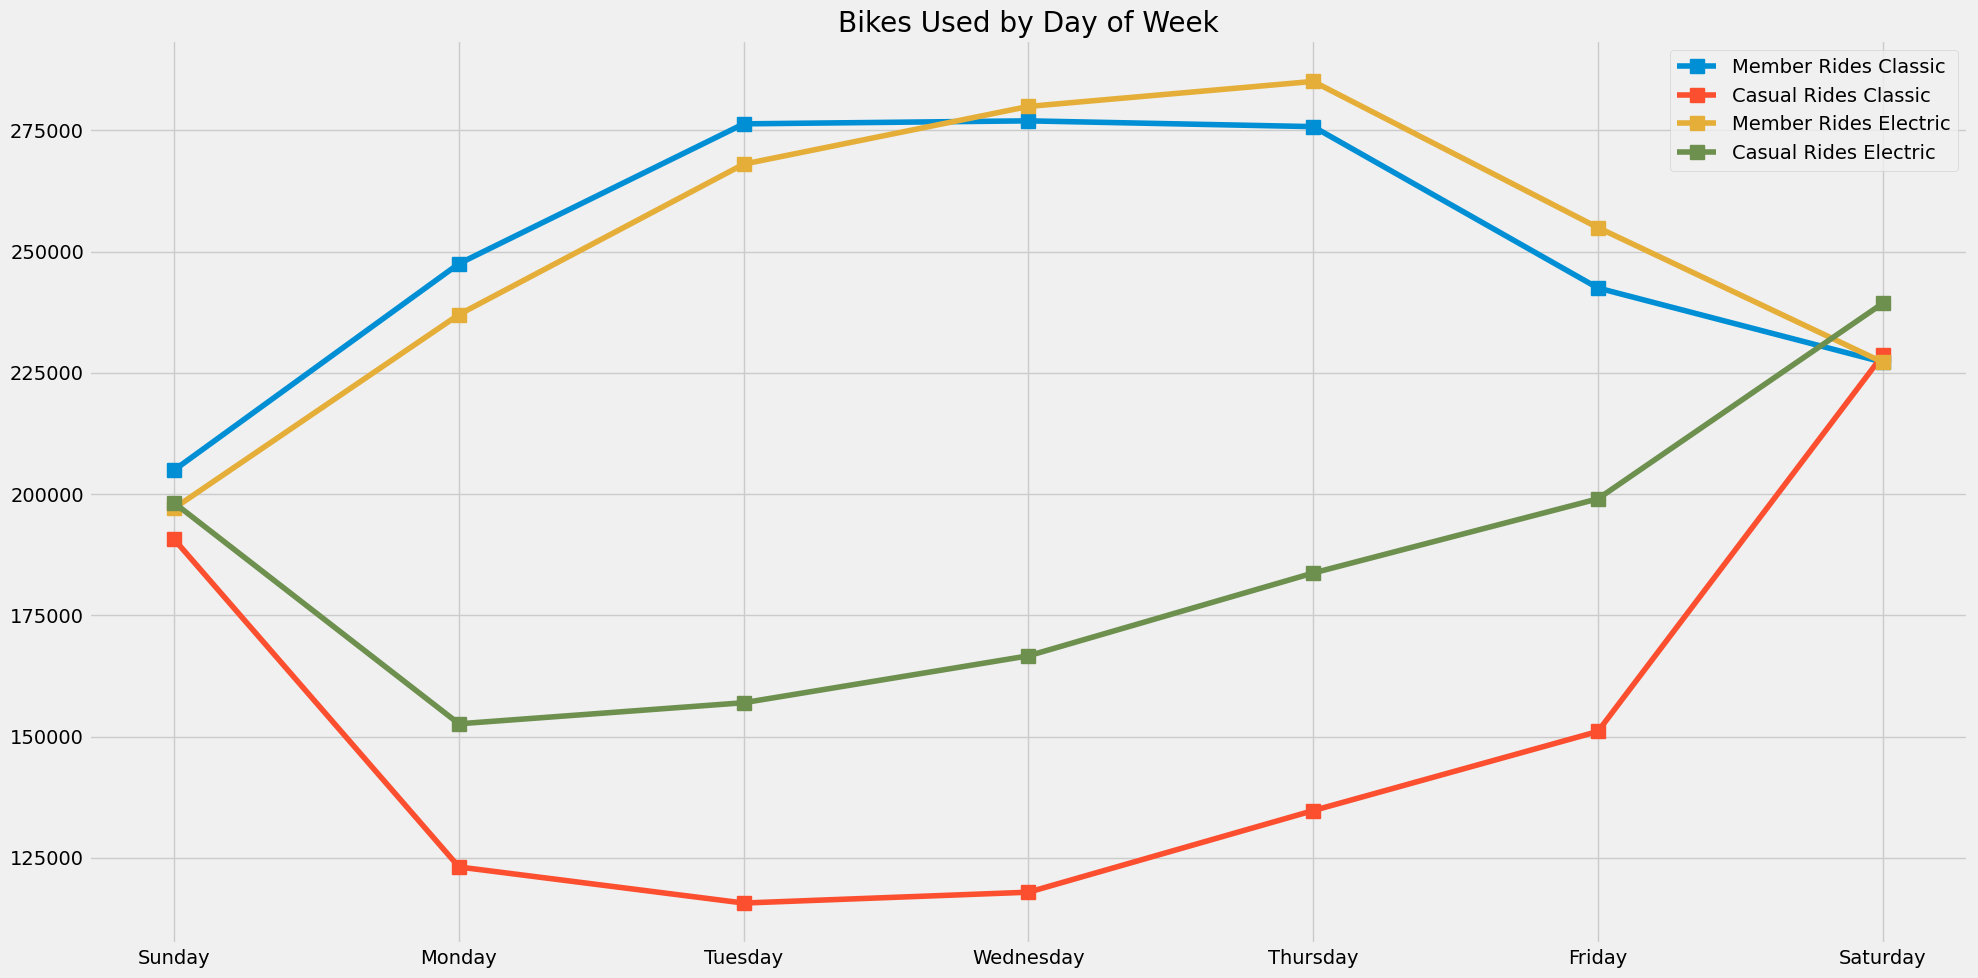

In [54]:
weekdays = df_bikes_dow['weekday']
c_mem = df_bikes_dow['classic_member']
c_cas = df_bikes_dow['classic_casual']
e_mem = df_bikes_dow['electric_member']
e_cas = df_bikes_dow['electric_casual']
plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(weekdays,c_mem, marker='s',markersize = 10, label = "Member Rides Classic")
plt.plot(weekdays,c_cas,  marker='s',markersize = 10,label = "Casual Rides Classic")
plt.plot(weekdays,e_mem, marker='s',markersize = 10, label = "Member Rides Electric")
plt.plot(weekdays,e_cas,  marker='s',markersize = 10,label = "Casual Rides Electric")

plt.legend()


plt.title("Bikes Used by Day of Week")

It appears that casual riders tend to prefer electric bikes over classic bikes especially on weekdays.  
Members tend to rent more classic bikes until midweek where they start to prefer electric  bikes.  __Perhaps they are getting tired!__ 


#### Monthly

In [65]:
sql_statement = f"""select 
	YYMM,
	sum(is_member_classic_bike_ride) as classic_member, 
	sum(is_casual_classic_bike_ride) as classic_casual,
	sum(is_member_electric_bike_ride) as electric_member,
	sum(is_casual_electric_bike_ride) as electric_casual
from
(
select substr(started_at, 1, 7) as YYMM,
case 
	when bike_type == "classic_bike"  and  is_member_ride == True then True
	else False
end as is_member_classic_bike_ride,
case 
	when bike_type == "classic_bike"  and is_casual_ride == True then True
	else False
end as is_casual_classic_bike_ride,
case 
	when bike_type == "electric_bike"  and  is_member_ride == True then True
	else False
end as is_member_electric_bike_ride,
case 
	when bike_type == "electric_bike"  and is_casual_ride == True then True
	else False
end as is_casual_electric_bike_ride
from v7
)
group by YYMM
order by YYMM"""

result = %sql {sql_statement}
df_bikes_mon = result.DataFrame()
df_bikes_mon.head(12)

 * sqlite://///Users/dinorusso/PyDev/Coursera_Case_Study_1/Cyclistic_Trip_Data/DB/cyclistic_v5.db
Done.


,YYMM,classic_member,classic_casual,electric_member,electric_casual
0,2022-05,197971,152484,156472,127931
1,2022-06,236664,200636,163489,168415
2,2022-07,217078,187150,200355,218905
3,2022-08,215415,154958,211593,203966
4,2022-09,200767,125201,203875,171496
5,2022-10,151992,74182,197704,134807
6,2022-11,111549,38938,125414,61834
7,2022-12,60698,14577,76214,30317
8,2023-01,76385,15647,73908,24361
9,2023-02,74354,17729,73075,25287


Text(0.5, 1.0, 'Bikes Used by Month')

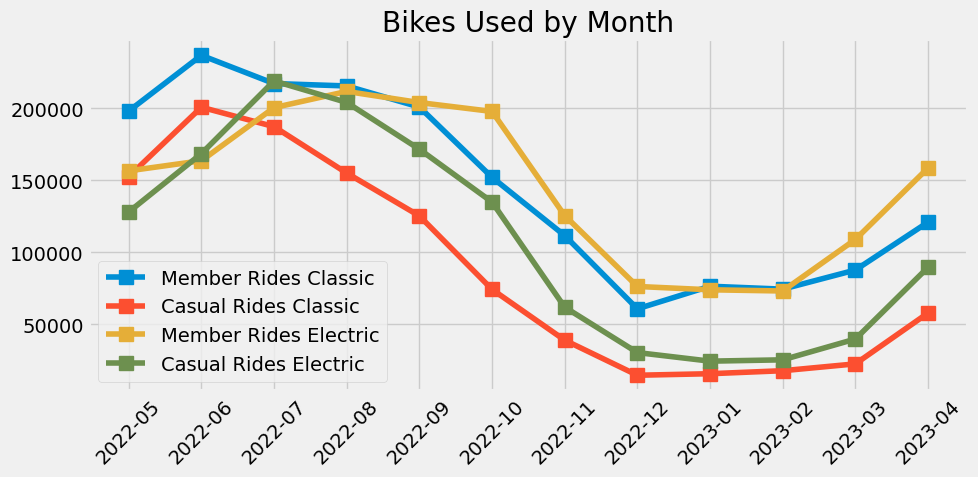

In [67]:
#plot results
months = df_bikes_mon['YYMM']
c_mem = df_bikes_mon['classic_member']
c_cas = df_bikes_mon['classic_casual']
e_mem = df_bikes_mon['electric_member']
e_cas = df_bikes_mon['electric_casual']
plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(months,c_mem, marker='s',markersize = 10, label = "Member Rides Classic")
plt.plot(months,c_cas,  marker='s',markersize = 10,label = "Casual Rides Classic")
plt.plot(months,e_mem, marker='s',markersize = 10, label = "Member Rides Electric")
plt.plot(months,e_cas,  marker='s',markersize = 10,label = "Casual Rides Electric")
plt.xticks(rotation = 45)
plt.legend()


plt.title("Bikes Used by Month")

#### Seasonal

Note that meteorilogical seasons were calculated and added to the data based on the timestamp of "started_at" field - also an ordinal was added "season_number" to allow for a logical ordering

In [55]:
#seasonal?
sql_statement = f"""select 
	season, 
	sum(is_member_classic_bike_ride) as classic_member, 
	sum(is_casual_classic_bike_ride) as classic_casual,
	sum(is_member_electric_bike_ride) as electric_member,
	sum(is_casual_electric_bike_ride) as electric_casual
from
(
select season, season_number,
case 
	when bike_type == "classic_bike"  and  is_member_ride == True then True
	else False
end as is_member_classic_bike_ride,
case 
	when bike_type == "classic_bike"  and is_casual_ride == True then True
	else False
end as is_casual_classic_bike_ride,
case 
	when bike_type == "electric_bike"  and  is_member_ride == True then True
	else False
end as is_member_electric_bike_ride,
case 
	when bike_type == "electric_bike"  and is_casual_ride == True then True
	else False
end as is_casual_electric_bike_ride
from v7

)
group by season
order by season_number"""
result = %sql {sql_statement}
df_bikes_season = result.DataFrame()
df_bikes_season.head(4)

 * sqlite://///Users/dinorusso/PyDev/Coursera_Case_Study_1/Cyclistic_Trip_Data/DB/cyclistic_v5.db
Done.


,season,classic_member,classic_casual,electric_member,electric_casual
0,Winter,211437,47953,223197,79965
1,Spring,406437,232746,423788,257155
2,Summer,669157,542744,575437,591286
3,Fall,464308,238321,526993,368137


Text(0.5, 1.0, 'Bikes Used by Season')

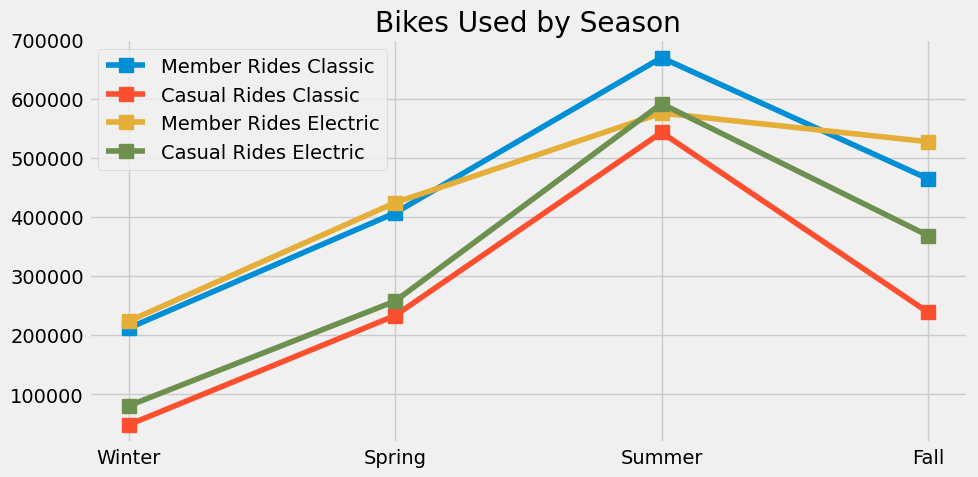

In [58]:
#plot results
seasons = df_bikes_season['season']
c_mem = df_bikes_season['classic_member']
c_cas = df_bikes_season['classic_casual']
e_mem = df_bikes_season['electric_member']
e_cas = df_bikes_season['electric_casual']
plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(seasons,c_mem, marker='s',markersize = 10, label = "Member Rides Classic")
plt.plot(seasons,c_cas,  marker='s',markersize = 10,label = "Casual Rides Classic")
plt.plot(seasons,e_mem, marker='s',markersize = 10, label = "Member Rides Electric")
plt.plot(seasons,e_cas,  marker='s',markersize = 10,label = "Casual Rides Electric")

plt.legend()


plt.title("Bikes Used by Season")

Let's compare ride frequency by riders by season and day of week

#### Part II - Ride Frequency

In [76]:


result = %sql SELECT  weekday, count(member_casual) as all_rides, sum(is_member_ride) as member_rides, sum(is_casual_ride) as casual_rides from v7 group by weekday order by v7.day_number
df_rides_dow = result.DataFrame()
df_rides_dow.head(7)

 * sqlite://///Users/dinorusso/PyDev/Coursera_Case_Study_1/Cyclistic_Trip_Data/DB/cyclistic_v5.db
Done.


,weekday,all_rides,member_rides,casual_rides
0,Sunday,790917,402081,388836
1,Monday,760316,484564,275752
2,Tuesday,817065,544402,272663
3,Wednesday,841491,556916,284575
4,Thursday,879355,560884,318471
5,Friday,847560,497476,350084
6,Saturday,922357,454431,467926


Text(0.5, 1.0, 'Annual Ride Frequency by Day of Week')

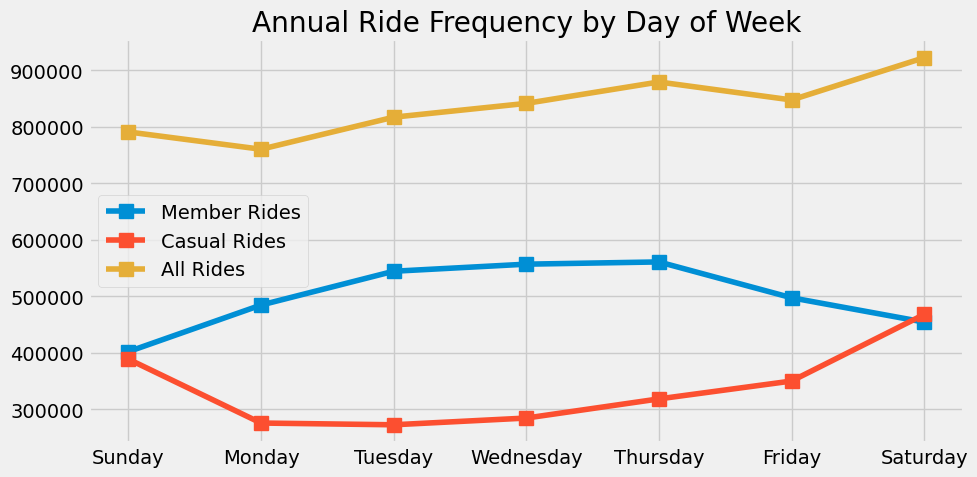

In [77]:
weekdays = df_rides_dow['weekday']
all_rides = df_rides_dow['all_rides']
member_rides = df_rides_dow['member_rides']
casual_rides = df_rides_dow['casual_rides']
plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(weekdays,member_rides, marker='s',markersize = 10, label = "Member Rides")
plt.plot(weekdays,casual_rides,  marker='s',markersize = 10,label = "Casual Rides")
plt.plot(weekdays,all_rides,  marker='s',markersize = 10,label = "All Rides")
plt.legend()


plt.title("Annual Ride Frequency by Day of Week")


##### Ride Frequency by Day of the Week

#### This chart indicates the differences between rider types depending on day of the week.
* Members and casual rider ride in about the same frequency on weekend days (Saturday and Sunday)
* Casual rider frequency drops off significantly on Monday and starts rampingup on Friday
* Member rider frequency increases significantly on Monday and starts declining on Friday 



In [78]:
result = %sql SELECT  substr(started_at, 1, 7) as YYYY_MM, count(member_casual) as all_rides, sum(is_member_ride) as member_rides, sum(is_casual_ride) as casual_rides from v7 group by substr(started_at, 1, 7) order by substr(started_at, 1, 7)
df_rides_month = result.DataFrame()
df_rides_month.head(12)

 * sqlite://///Users/dinorusso/PyDev/Coursera_Case_Study_1/Cyclistic_Trip_Data/DB/cyclistic_v5.db
Done.


,YYYY_MM,all_rides,member_rides,casual_rides
0,2022-05,634858,354443,280415
1,2022-06,769204,400153,369051
2,2022-07,823488,417433,406055
3,2022-08,785932,427008,358924
4,2022-09,701339,404642,296697
5,2022-10,558685,349696,208989
6,2022-11,337735,236963,100772
7,2022-12,181806,136912,44894
8,2023-01,190301,150293,40008
9,2023-02,190445,147429,43016


Text(0.5, 1.0, 'Annual Ride Frequency by Month')

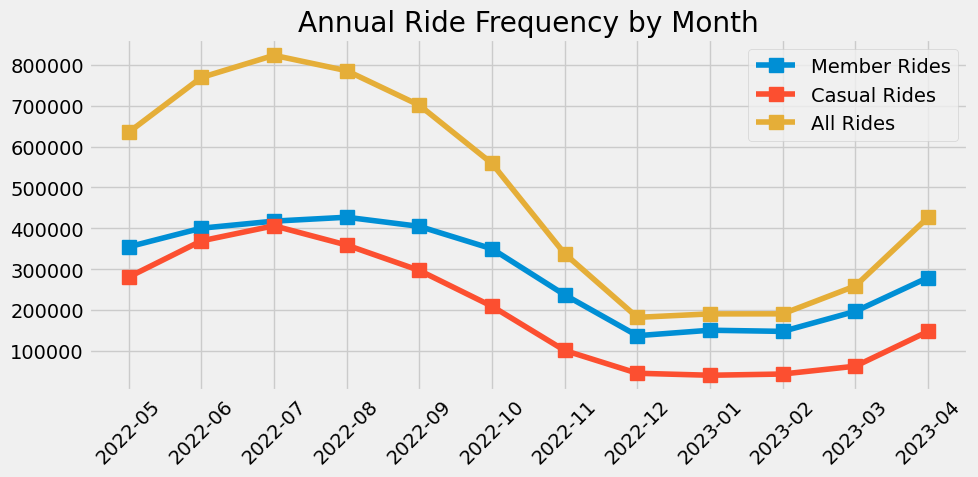

In [79]:
months = df_rides_month['YYYY_MM']
all_rides = df_rides_month['all_rides']
member_rides = df_rides_month['member_rides']
casual_rides = df_rides_month['casual_rides']
plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(months,member_rides, marker='s',markersize = 10, label = "Member Rides")
plt.plot(months,casual_rides,  marker='s',markersize = 10,label = "Casual Rides")
plt.plot(months,all_rides,  marker='s',markersize = 10,label = "All Rides")
plt.xticks(rotation = 45)
plt.legend()


plt.title("Annual Ride Frequency by Month")

In [80]:
#ride frequency by Time of Day (Hour) based on Start Time
result = %sql select substr(started_at, 11, 3) as start_hour, count(ride_id) as all_rides, sum(is_casual_ride) as casual_rides, sum(is_member_ride) as member_rides from v7 group by substr(started_at, 11, 3) order by substr(started_at, 11, 3) 
df_rides_hour = result.DataFrame()
df_rides_hour.head(24)

 * sqlite://///Users/dinorusso/PyDev/Coursera_Case_Study_1/Cyclistic_Trip_Data/DB/cyclistic_v5.db
Done.


,start_hour,all_rides,casual_rides,member_rides
0,00,84680,47113,37567
1,01,53348,30410,22938
2,02,32284,18802,13482
3,03,19254,11007,8247
4,04,16767,7680,9087
5,05,45567,12848,32719
6,06,128101,31240,96861
7,07,234060,54059,180001
8,08,289834,72823,217011
9,09,226857,74458,152399


Text(0.5, 1.0, 'Ride Counts by Start Time (Hour 00 - 23) Using started_at value')

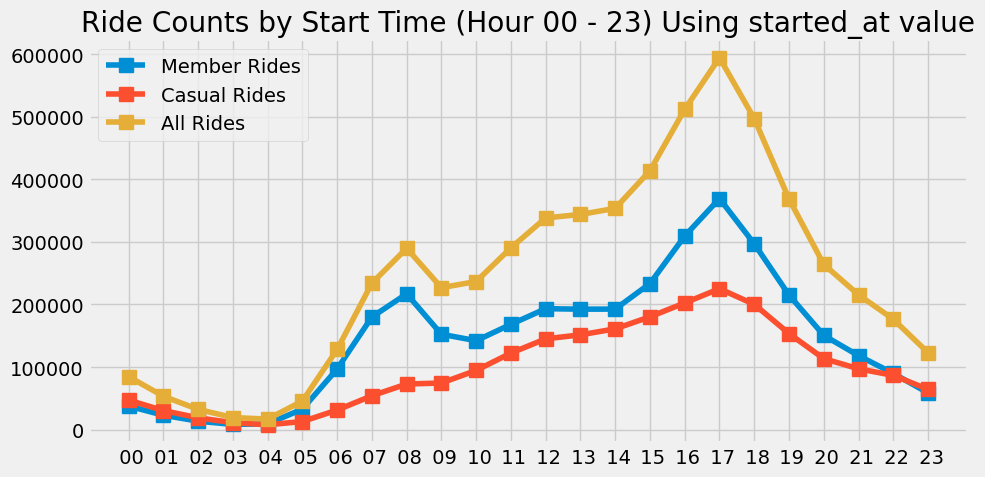

In [81]:
hours = df_rides_hour['start_hour']
all_rides = df_rides_hour['all_rides']
member_rides = df_rides_hour['member_rides']
casual_rides = df_rides_hour['casual_rides']
plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(hours,member_rides, marker='s',markersize = 10, label = "Member Rides")
plt.plot(hours,casual_rides,  marker='s',markersize = 10,label = "Casual Rides")
plt.plot(hours,all_rides,  marker='s',markersize = 10,label = "All Rides")
plt.legend()


plt.title("Ride Counts by Start Time (Hour 00 - 23) Using started_at value")

Member rides increase dramatically starting at 5:00 AM to 8:00 am; they increase again between 3:00 PM and 7:00PM (likely peak commute times work)
Casual rides volume is less appears to be less influenced by TOD by highest number of starts are between 10:00 AM and 7:00 PM 

#### Part II - Ride Duration

In [82]:
result = %sql  SELECT  weekday,round(avg(NULLIF(ride_duration_mins,0))) as all_rides,round(avg(NULLIF(member_ride_duration_mins, 0))) as member_rides,round(avg(NULLIF(casual_ride_duration_mins, 0))) as casual_rides from v7 group by weekday order by v7.day_number
df_ride_durations_dow = result.DataFrame()
df_ride_durations_dow.head(7)

 * sqlite://///Users/dinorusso/PyDev/Coursera_Case_Study_1/Cyclistic_Trip_Data/DB/cyclistic_v5.db
Done.


,weekday,all_rides,member_rides,casual_rides
0,Sunday,24.0,14.0,34.0
1,Monday,18.0,12.0,29.0
2,Tuesday,17.0,12.0,26.0
3,Wednesday,16.0,12.0,25.0
4,Thursday,17.0,12.0,25.0
5,Friday,19.0,13.0,28.0
6,Saturday,24.0,14.0,33.0


Text(0.5, 1.0, 'Annual Ride Average Duration (Mins) by Day of Week')

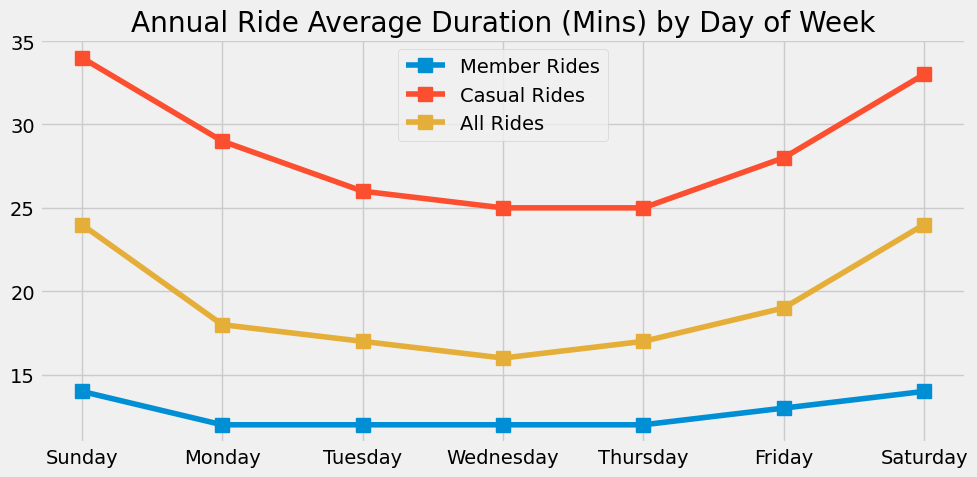

In [34]:
weekdays = df_ride_durations_dow['weekday']
all_rides = df_ride_durations_dow['all_rides']
member_rides = df_ride_durations_dow['member_rides']
casual_rides = df_ride_durations_dow['casual_rides']
plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(weekdays,member_rides, marker='s',markersize = 10, label = "Member Rides")
plt.plot(weekdays,casual_rides,  marker='s',markersize = 10,label = "Casual Rides")
plt.plot(weekdays,all_rides,  marker='s',markersize = 10,label = "All Rides")
plt.legend()


plt.title("Annual Ride Average Duration (Mins) by Day of Week")

#### This chart indicates the differences between rider average ride durations depending on day of the week.
* Member rider average durations are relatively flat with a minor increase on weekend; durations are half as long as casual riders 
* Casual riders tend to have twice as long rides as compared to members 

In [35]:
result = %sql  SELECT substr(v7.started_at, 1, 7) as YYYY_MM,round(avg(NULLIF(ride_duration_mins,0))) as all_rides, round(avg(NULLIF(member_ride_duration_mins, 0))) as member_rides,round(avg(NULLIF(casual_ride_duration_mins, 0))) as casual_rides from v7 group by substr(started_at, 1, 7) order by substr(started_at, 1, 7)
df_rides_yymm = result.DataFrame()
df_rides_yymm.head(12)


 * sqlite://///Users/dinorusso/PyDev/Coursera_Case_Study_1/Cyclistic_Trip_Data/DB/cyclistic_v5.db
Done.


,YYYY_MM,all_rides,member_rides,casual_rides
0,2022-05,21.0,14.0,31.0
1,2022-06,23.0,14.0,33.0
2,2022-07,22.0,14.0,30.0
3,2022-08,21.0,14.0,30.0
4,2022-09,20.0,13.0,28.0
5,2022-10,18.0,12.0,27.0
6,2022-11,14.0,11.0,22.0
7,2022-12,14.0,11.0,23.0
8,2023-01,13.0,11.0,23.0
9,2023-02,14.0,11.0,24.0


Text(0.5, 1.0, 'Annual Ride Avgerage Duration (Mins) by Month')

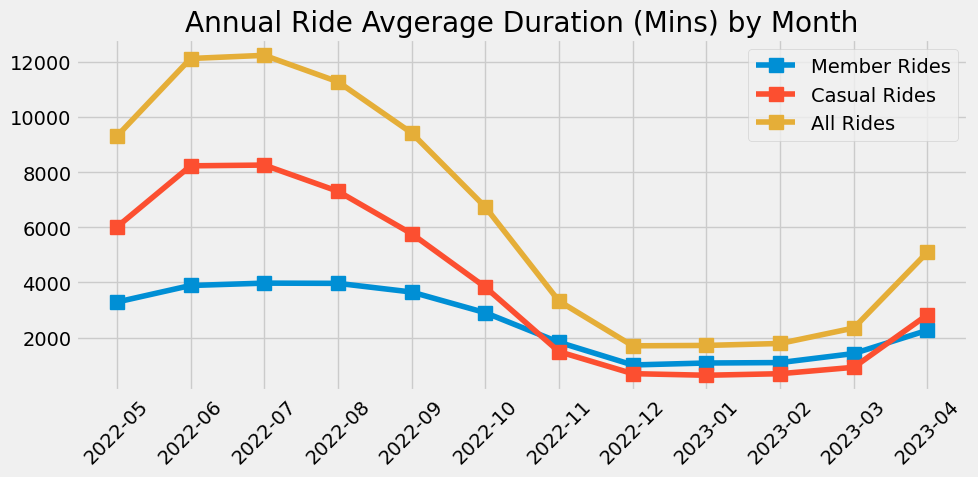

In [69]:
months = df_rides_yymm['YYYY_MM']
all_rides = df_rides_yymm['all_rides']
member_rides = df_rides_yymm['member_rides']
casual_rides = df_rides_yymm['casual_rides']
plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(months,member_rides, marker='s',markersize = 10, label = "Member Rides")
plt.plot(months,casual_rides,  marker='s',markersize = 10,label = "Casual Rides")
plt.plot(months,all_rides,  marker='s',markersize = 10,label = "All Rides")
plt.xticks(rotation = 45)
plt.legend()


plt.title("Annual Ride Avgerage Duration (Mins) by Month")

#### This chart indicates the differences between rider average ride durations depending on month.
* Member rider average durations are relatively flat with a minor decrease in colder months; durations are under 15 mins avg
* Casual riders average durations rise in April and begin a slow decline in Aug; November thru March avg ride durations are relatively flat but still almost 2x members

In [37]:
result = %sql  SELECT  weekday,round(sum(ride_duration_mins)) as all_rides,round(sum(member_ride_duration_mins)) as member_rides,round(sum(casual_ride_duration_mins)) as casual_rides from v7 group by weekday order by v7.day_number
df_ride_durations_dow = result.DataFrame()
df_ride_durations_dow.head(7)

 * sqlite://///Users/dinorusso/PyDev/Coursera_Case_Study_1/Cyclistic_Trip_Data/DB/cyclistic_v5.db
Done.


,weekday,all_rides,member_rides,casual_rides
0,Sunday,18558887.0,5557686.0,13001201.0
1,Monday,13624991.0,5803098.0,7821893.0
2,Tuesday,13413398.0,6505317.0,6908081.0
3,Wednesday,13510168.0,6631702.0,6878466.0
4,Thursday,14651546.0,6786105.0,7865441.0
5,Friday,15783304.0,6150068.0,9633236.0
6,Saturday,21416832.0,6329859.0,15086973.0


Text(0.5, 1.0, 'Annual Ride Total Ride Duration (Mins) by Day of Week')

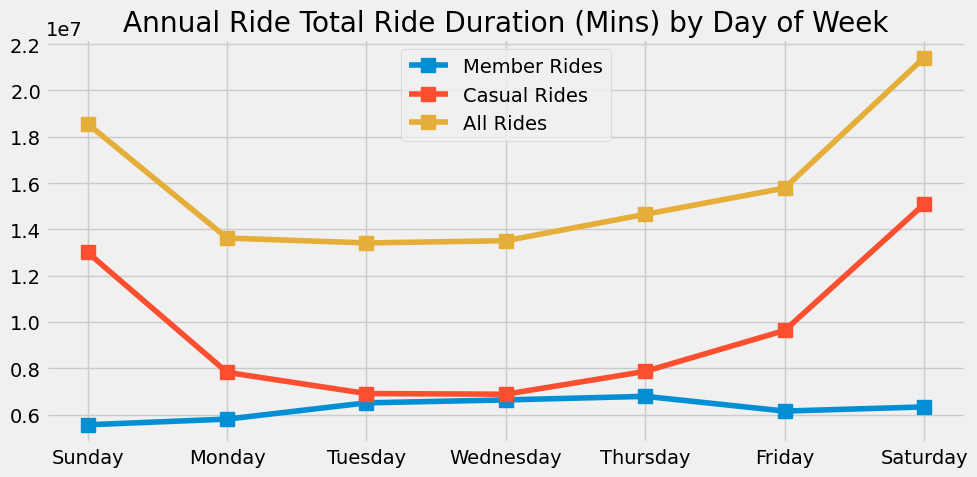

In [38]:
weekdays = df_ride_durations_dow['weekday']
all_rides = df_ride_durations_dow['all_rides']
member_rides = df_ride_durations_dow['member_rides']
casual_rides = df_ride_durations_dow['casual_rides']
plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(weekdays,member_rides, marker='s',markersize = 10, label = "Member Rides")
plt.plot(weekdays,casual_rides,  marker='s',markersize = 10,label = "Casual Rides")
plt.plot(weekdays,all_rides,  marker='s',markersize = 10,label = "All Rides")
plt.legend()


plt.title("Annual Ride Total Ride Duration (Mins) by Day of Week")

#### This chart indicates the differences between total member vs casual total minutes of rides by day of the week.
* Member rider total durations are relatively flat and significantly less than casual total durations.
* Casual riders average durations rise in April and begin a slow decline in Aug; November thru March avg ride durations are relatively flat but still almost 2x members

In [39]:
result = %sql  SELECT substr(v7.started_at, 1, 7) as YYYY_MM,round(sum(ride_duration_mins)) as all_rides, round(sum(member_ride_duration_mins)) as member_rides,round(sum(casual_ride_duration_mins)) as casual_rides from v7 group by substr(started_at, 1, 7) order by substr(started_at, 1, 7)
df_rides_yymm = result.DataFrame()
df_rides_yymm.head(12)

 * sqlite://///Users/dinorusso/PyDev/Coursera_Case_Study_1/Cyclistic_Trip_Data/DB/cyclistic_v5.db
Done.


,YYYY_MM,all_rides,member_rides,casual_rides
0,2022-05,13393004.0,4737144.0,8655860.0
1,2022-06,17447862.0,5601450.0,11846412.0
2,2022-07,17613708.0,5725897.0,11887811.0
3,2022-08,16234371.0,5714599.0,10519772.0
4,2022-09,13562518.0,5259890.0,8302628.0
5,2022-10,9695848.0,4181572.0,5514276.0
6,2022-11,4784420.0,2637752.0,2146668.0
7,2022-12,2454438.0,1453926.0,1000512.0
8,2023-01,2473348.0,1556669.0,916679.0
9,2023-02,2576408.0,1578844.0,997564.0


Text(0.5, 1.0, 'Annual Ride Duration (mins) by Month')

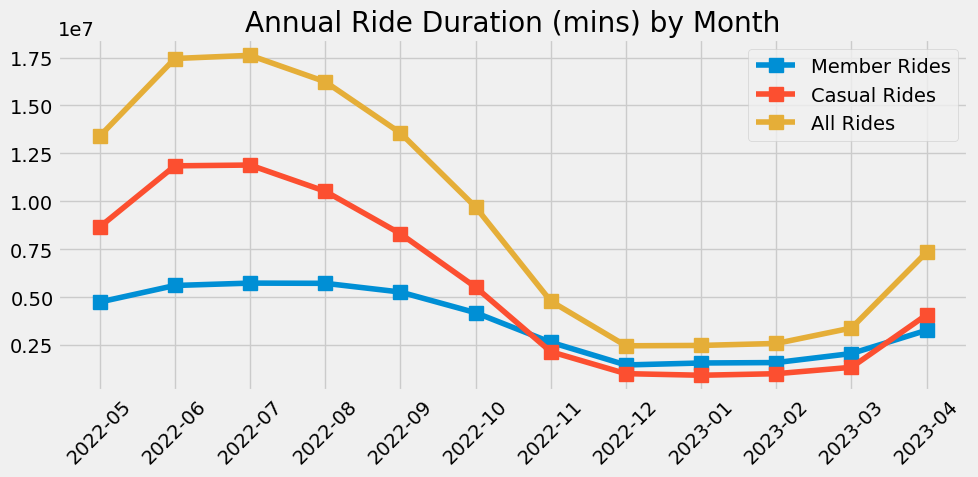

In [40]:
months = df_rides_yymm['YYYY_MM']
all_rides = df_rides_yymm['all_rides']
member_rides = df_rides_yymm['member_rides']
casual_rides = df_rides_yymm['casual_rides']
plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(months,member_rides, marker='s',markersize = 10, label = "Member Rides")
plt.plot(months,casual_rides,  marker='s',markersize = 10,label = "Casual Rides")
plt.plot(months,all_rides,  marker='s',markersize = 10,label = "All Rides")
plt.xticks(rotation = 45)
plt.legend()


plt.title("Annual Ride Duration (mins) by Month")

#### This chart indicates the differences between total member vs casual total minutes of rides by month.
* Member rider total durations slightly exceed casual total durations in Nov - Mar.
* Casual riders total durations rise in April and outpace member rider total durations through October with peaks in June and July

In [41]:
result = %sql  SELECT substr(v7.started_at, 1, 7) as YYYY_MM,round(sum(ride_duration_mins)/1440) as all_rides, round(sum(member_ride_duration_mins)/1440) as member_rides,round(sum(casual_ride_duration_mins)/1440) as casual_rides from v7 group by substr(started_at, 1, 7) order by substr(started_at, 1, 7)
df_rides_yymm = result.DataFrame()
df_rides_yymm.head(12)

 * sqlite://///Users/dinorusso/PyDev/Coursera_Case_Study_1/Cyclistic_Trip_Data/DB/cyclistic_v5.db
Done.


,YYYY_MM,all_rides,member_rides,casual_rides
0,2022-05,9301.0,3290.0,6011.0
1,2022-06,12117.0,3890.0,8227.0
2,2022-07,12232.0,3976.0,8255.0
3,2022-08,11274.0,3968.0,7305.0
4,2022-09,9418.0,3653.0,5766.0
5,2022-10,6733.0,2904.0,3829.0
6,2022-11,3323.0,1832.0,1491.0
7,2022-12,1704.0,1010.0,695.0
8,2023-01,1718.0,1081.0,637.0
9,2023-02,1789.0,1096.0,693.0


Text(0.5, 1.0, 'Annual Ride Duration (Days) by Month')

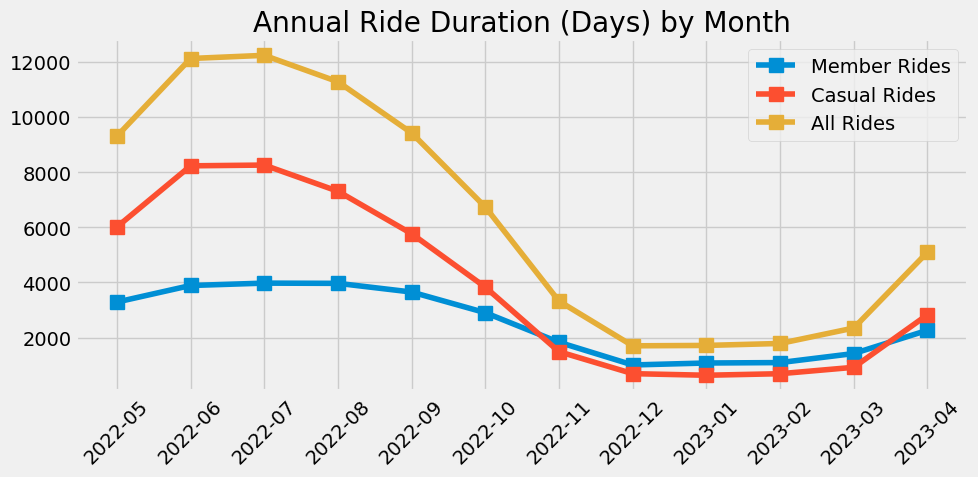

In [42]:
months = df_rides_yymm['YYYY_MM']
all_rides = df_rides_yymm['all_rides']
member_rides = df_rides_yymm['member_rides']
casual_rides = df_rides_yymm['casual_rides']
plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(months,member_rides, marker='s',markersize = 10, label = "Member Rides")
plt.plot(months,casual_rides,  marker='s',markersize = 10,label = "Casual Rides")
plt.plot(months,all_rides,  marker='s',markersize = 10,label = "All Rides")
plt.xticks(rotation = 45)
plt.legend()


plt.title("Annual Ride Duration (Days) by Month")

#### This chart indicates the differences between total member vs casual total days of rides durations by month.
* Member rider total durations slightly exceed casual total durations in Nov - Mar.
* Casual riders total durations rise in April and outpace member rider total durations through October with peaks in June and July

In [43]:
result = %sql  SELECT  weekday,round(sum(ride_duration_mins)/1440) as all_rides,round(sum(member_ride_duration_mins)/1440) as member_rides,round(sum(casual_ride_duration_mins)/1440) as casual_rides from v7 group by weekday order by v7.day_number
df_ride_durations_dow = result.DataFrame()
df_ride_durations_dow.head(7)

 * sqlite://///Users/dinorusso/PyDev/Coursera_Case_Study_1/Cyclistic_Trip_Data/DB/cyclistic_v5.db
Done.


,weekday,all_rides,member_rides,casual_rides
0,Sunday,12888.0,3860.0,9029.0
1,Monday,9462.0,4030.0,5432.0
2,Tuesday,9315.0,4518.0,4797.0
3,Wednesday,9382.0,4605.0,4777.0
4,Thursday,10175.0,4713.0,5462.0
5,Friday,10961.0,4271.0,6690.0
6,Saturday,14873.0,4396.0,10477.0


Text(0.5, 1.0, 'Annual Ride Total Ride Duration (Days) by Day of Week')

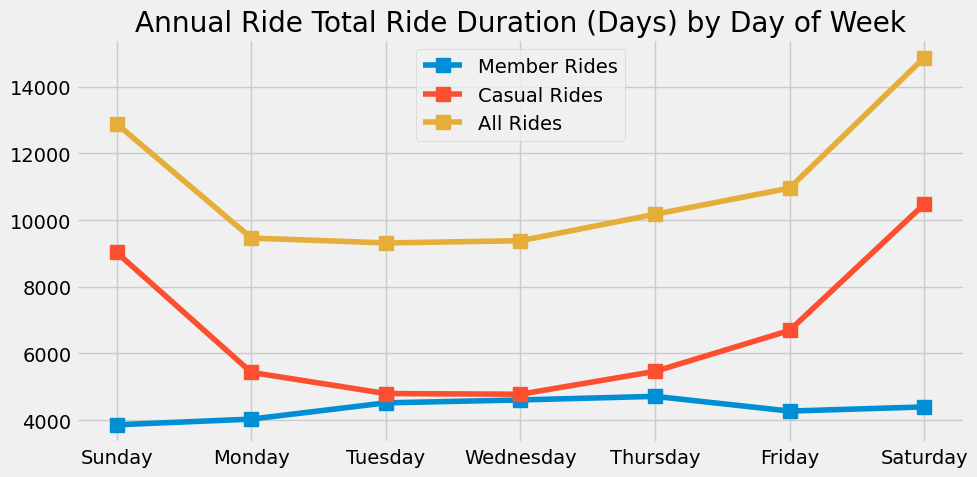

In [44]:
weekdays = df_ride_durations_dow['weekday']
all_rides = df_ride_durations_dow['all_rides']
member_rides = df_ride_durations_dow['member_rides']
casual_rides = df_ride_durations_dow['casual_rides']
plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(weekdays,member_rides, marker='s',markersize = 10, label = "Member Rides")
plt.plot(weekdays,casual_rides,  marker='s',markersize = 10,label = "Casual Rides")
plt.plot(weekdays,all_rides,  marker='s',markersize = 10,label = "All Rides")
plt.legend()


plt.title("Annual Ride Total Ride Duration (Days) by Day of Week")

#### This chart indicates the differences between total member vs casual total days of rides by day of the week.
* Member rider total durations are relatively flat and significantly less than casual total durations.
* Casual riders average durations rise in April and begin a slow decline in Aug; November thru March avg ride durations are relatively flat but still almost 2x members